## **get_frames working**

In [1]:
import matplotlib.pyplot as plt
import datetime
import cv2 

In [49]:
video  = cv2.VideoCapture(r"A:\videoplayback.mp4")

In [50]:
# count the number of frames
frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
fps = video.get(cv2.CAP_PROP_FPS)

# print(frames, ' ', fps)
# calculate duration of the video
print('Total frames per second is:', fps)
print('Total no of frames:', frames)
seconds = round(frames / fps)
video_time = datetime.timedelta(seconds=seconds)

print(f"duration in seconds: {seconds}")
print(f"video time: {video_time}")

Total frames per second is: 30.0
Total no of frames: 4363.0
duration in seconds: 145
video time: 0:02:25


In [2]:
video.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
ret, frame = video.read()
plt.imshow(frame)

In [ ]:

frame_id = int(fps)
video.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
ret, frame = video.read()
cv2.imwrite(str(frame_id)+'.jpg',frame)

print('frame id =',frame_id) # no of frames in 1:14 minutes

frame id = 30


# **Final Function**

In [32]:
import cv2
import time

def get_frames(path, sec):
    video  = cv2.VideoCapture(path)
    # will count the frame per second 
    fps = video.get(cv2.CAP_PROP_FPS)
    frame_af_sec = fps*sec
    i=0
    while(video.isOpened()):
        # will get the frame after each second. not every frame will be taken
        frame_id = fps 
        video.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
        ret, frame = video.read()
        # ret, when it reach to end, it gets False
        if ret == False:
            break
        # write image on the current folder with frame id
        cv2.imwrite(str(frame_id)+'.jpg',frame)
        i+=1
        fps+=frame_af_sec
        # time.sleep(3)

    video.release()
    # cv2.destroyAllWindows()
get_frames(r'A:\videoplayback.mp4', 10)

# **detection**

In [3]:
from get_frames import get_frames
from deepface import DeepFace
from glob import glob
import os 
import matplotlib.pyplot as plt
import numpy as np
#face detection and alignment
import cv2
from retinaface import RetinaFace


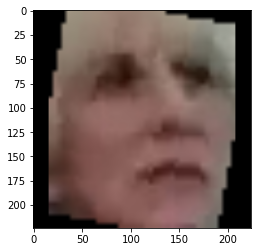

In [ ]:
path = os.getcwd()
ls_of_frame = glob(path+'/video_frame/*')  
# print(len(ls_of_frame))

# detect face 
face = DeepFace.detectFace(
        img_path = r'C:\Product\FS\Models\DEEPFACE\video_frame\600.0.jpg', 
        target_size = (224, 224), 
        detector_backend = 'retinaface'
)
plt.imshow(face)

# # now need to save this as jpg
curr_dir = os.getcwd()
faces= os.makedirs('faces', exist_ok=True)
curr_dir = os.path.join(curr_dir, 'faces')

cv2.imwrite(f"{curr_dir}/{2}.png", face)

In [1]:
from get_frames import get_frames
from deepface import DeepFace
from glob import glob
import os 
import matplotlib.pyplot as plt
import numpy as np
#face detection and alignment
import cv2


In [ ]:
path = os.getcwd()
ls_of_frame = glob(path+'/video_frame/*')  

curr_dir = os.getcwd()
faces= os.makedirs('faces', exist_ok=True)
curr_dir = os.path.join(curr_dir, 'faces')


i = 0
def find_face(i):
    try:        
        print(i)
        face = DeepFace.detectFace(img_path = ls_of_frame[i], 
                target_size = (224, 224), 
                detector_backend = 'retinaface'
                )
    except ValueError:
        print(f"I didn't found image so going the next frame {i+1}")
        find_face(i+1)
    else:
        # print("in the else block")
        plt.imshow(face)
        cv2.imwrite(f"{curr_dir}/{i}.jpg", face)
        find_face(i+1)
        
find_face(i)

- here we don't need to add try block

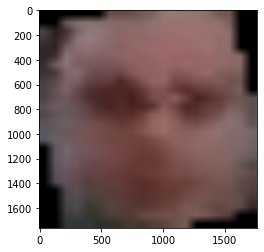

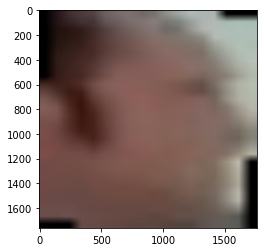

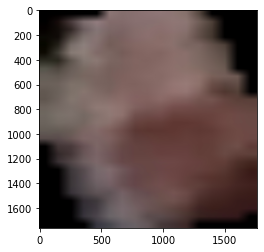

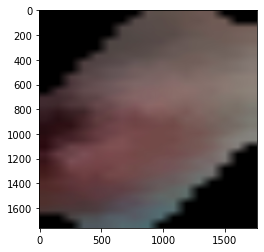

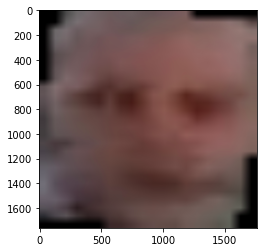

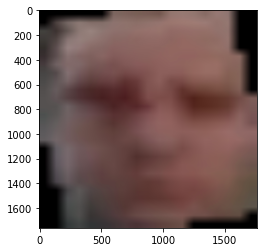

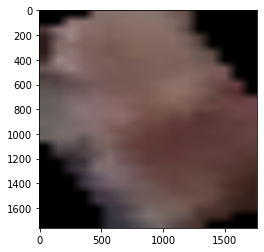

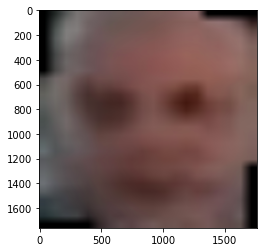

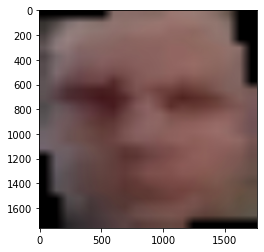

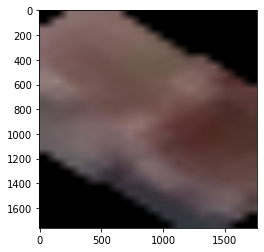

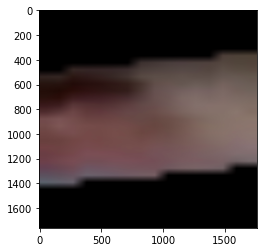

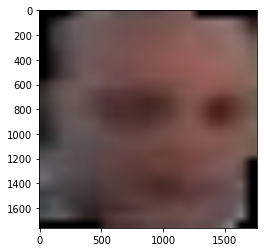

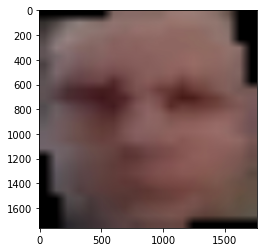

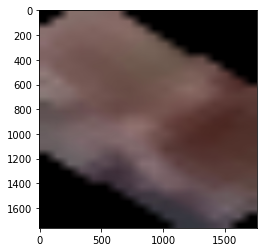

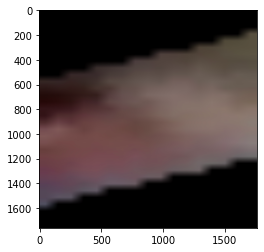

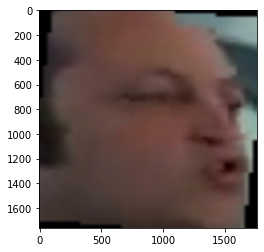

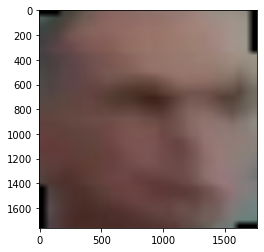

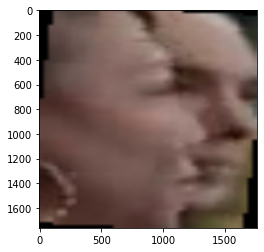

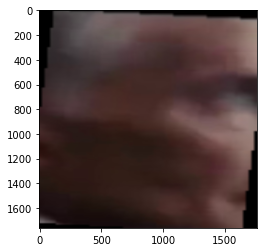

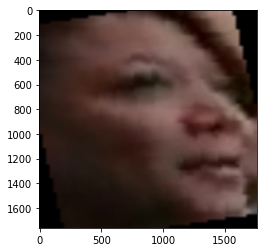

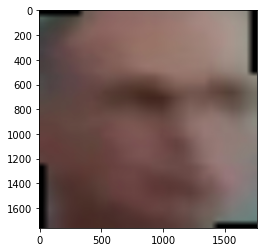

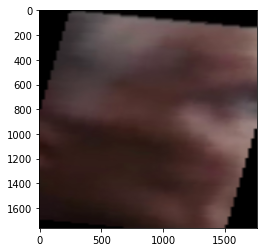

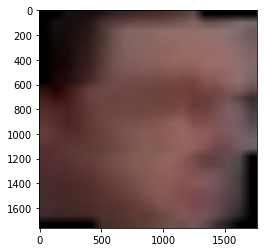

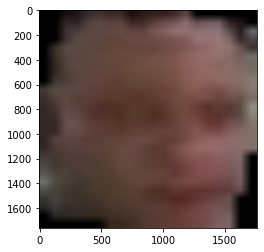

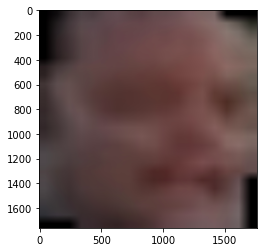

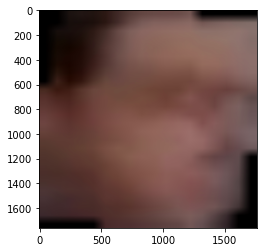

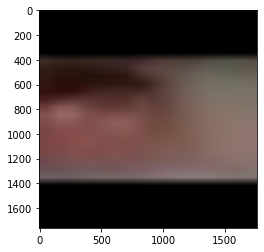

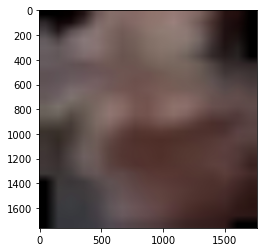

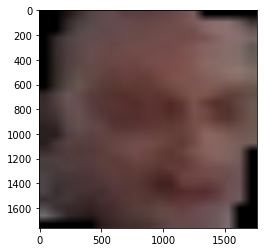

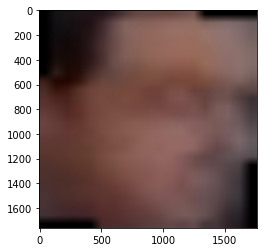

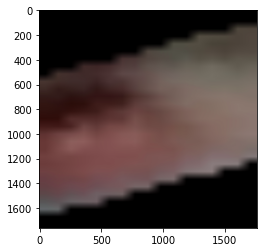

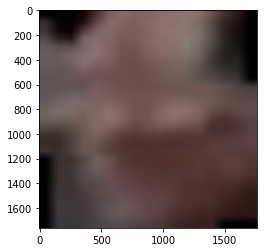

KeyboardInterrupt: 

In [46]:
import cv2
from cv2 import dnn_superres

path = os.getcwd()
curr_dir = os.getcwd()
faces= os.makedirs('new_faces', exist_ok=True)
curr_dir = os.path.join(curr_dir, 'new_faces')



ls_of_frame = glob(path+'/video_frame/*')
# ls_of_frame = [r"C:\Users\Abu Ubaida\Desktop\download.jpg",r"C:\Users\Abu Ubaida\Desktop\download (1).jpg",r"C:\Users\Abu Ubaida\Desktop\download (2).jpg",r"C:\Users\Abu Ubaida\Desktop\images.jpg"]  

import PIL

i = 0
no = 9
def find_face(i):
    lol = len(ls_of_frame)
    global no
    # if no pic found it just pass
    faces = RetinaFace.extract_faces(
        img_path = ls_of_frame[i], align = True, allow_upscaling=True)
    dim = (440, 440)
    for f in faces:
        # increasing resolution 
        img = cv2.resize(f, dim)

        sr = dnn_superres.DnnSuperResImpl_create()
        path = "FSRCNN_x4.pb"
        sr.readModel(path)
        sr.setModel("fsrcnn",4)
        result = sr.upsample(img)

        image = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
        cv2.imwrite(f"{curr_dir}/{no}.png", image)
        
        plt.imshow(image[:,:,::-1])
        plt.show()
        no+=1
        
    # Error out of index has been resolve
    if i+1<lol:
        find_face(i+1) 

find_face(i)


#TODO: I need to fix size, color, removing of bad pics

In [3]:
'''
This class will be used to get the cropped face area from images. Images have been gotten from video through get_frames.py file --refer to it
'''

from turtle import heading, width
from deepface import DeepFace
from glob import glob
from retinaface import RetinaFace
import os 
import matplotlib.pyplot as plt
import numpy as np
import cv2
from cv2 import dnn_superres


class Detection:
    def __init__(self, mk_dir, vid_frame_path, height=360, width=360):
        self.mk_dir = mk_dir
        self.frames = vid_frame_path
        self.index = 0
        self.no = 0
        self.height = height
        self.width = width


    def make_dir(self):
        curr_dir = os.getcwd()
        os.makedirs(self.mk_dir, exist_ok=True)
        path = os.path.join(curr_dir, str(self.mk_dir))
        return path


    def find_face(self):
        self.frames.replace('\\','/')
        ls_of_frames = glob(self.frames+'/*')  
        lol = len(ls_of_frames)
        # if no pic found it will just pass
        faces = RetinaFace.extract_faces(
            img_path = ls_of_frames[self.index], align = True, allow_upscaling=True)
        dim = (self.width, self.height)
        
        path = self.make_dir()
        
        for f in faces:
            img = cv2.resize(f, dim)
            
            # upsampling with Fast RCNN
            sr = dnn_superres.DnnSuperResImpl_create()
            path = "FSRCNN_x4.pb"
            sr.readModel(path)
            sr.setModel("fsrcnn",4)
            result = sr.upsample(img)
            image = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

            cv2.imwrite(f"{path}/{self.no}.jpg", image)
            # plt.imshow(f)
            # plt.show()
            self.no+=1 # unique pic 
        
        self.index+=1
        if self.index<lol:
            self.find_face()
    

if __name__ == "__main__":
    obj = Detection('faces',r'C:\Product\FS\Models\DEEPFACE\video_frame', 300, 300)
    obj.find_face()

In [ ]:
'''
print('Original Dimensions : ', f.shape)
dim = (340, 340)
# resize image  
resized = cv2.resize(f, dim, interpolation = cv2.INTER_AREA)
# Resized image
print('Resized Dimensions : ',resized.shape)
plt.imshow(resized)
resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
resized = cv2.detailEnhance(resized, sigma_s=9, sigma_r=0.15)
cv2.imwrite(f"{curr_dir}/{no}.png", resized)
plt.show()
no+=1 # unique pic '''


'''     
sr = dnn_superres.DnnSuperResImpl_create()
path = "FSRCNN_x4.pb"

sr.readModel(path)

sr.setModel("fsrcnn",4)

result = sr.upsample(img)

# Resized image
resized = cv2.resize(img,dsize=None,fx=3,fy=3)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img[:,:,::-1])
plt.subplot(1,3,2)
# SR upscaled
plt.imshow(result[:,:,::-1])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.show()     '''   

## **Duplicates Removal**

In [301]:
import os
import filecmp

def remove_duplicate(fold_path):
    # global nex_img # to escape from re-initialization 
    path = fold_path.replace("\\", '/') # to convert slashes
    faces_list = glob(path+'/*') 
    imgs_len = len(faces_list)
    
    remove_images=[]
    for img in range(len(faces_list)):
        nex_img = img+1
        while (nex_img < imgs_len):
            if faces_list[img]!= faces_list[nex_img]:
                if filecmp.cmp(faces_list[nex_img], faces_list[img]):
                    # os.remove(faces_list[nex_img])
                    remove_images.append(faces_list[nex_img])
            nex_img+=1

    # now we got list: let's remove duplicates from this
    ls = set(remove_images)
    for i in ls:
        os.remove(i)
    print("All duplicated item has been removed")

remove_duplicate(r'C:\Product\FS\Models\DEEPFACE\new_faces')


All duplicated item has been removed


In [271]:
# def rem(path):
#     try:
#         remove_duplicate(path)
#     except FileNotFoundError:
#         rem()
#     else:
#         print('Removed all!')
        
# # rem(r'C:\Product\FS\Models\DEEPFACE\new_faces')

# **Face Analysis**

In [48]:

Analysis = DeepFace.analyze(img_path = r"C:\Product\FS\Models\YOLO\frames\30.0.jpg", 
        detector_backend = 'retinaface', 
        enforce_detection=False
)
Analysis['emotion']


Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 50ms/step


Action: age:  25%|██▌       | 1/4 [00:04<00:13,  4.51s/it]    

1/1 [==============================] - 0s 353ms/step


Action: gender:  50%|█████     | 2/4 [00:08<00:08,  4.47s/it]

1/1 [==============================] - 0s 354ms/step


Action: race:  75%|███████▌  | 3/4 [00:09<00:02,  2.63s/it]  

1/1 [==============================] - 0s 307ms/step


Action: race: 100%|██████████| 4/4 [00:09<00:00,  2.45s/it]


{'angry': 1.089944941696223,
 'disgust': 0.0005065561555945026,
 'fear': 3.3371644221046224,
 'happy': 4.340575521622629,
 'sad': 7.126291520970555,
 'surprise': 0.24993144068458323,
 'neutral': 83.85558628175177}

# **Storing Similar Faces**

In [1]:
from glob import glob
import os
import pandas as pd
from deepface import DeepFace
import shutil
# shutil.move(r'C:\Product\FS\Models\DEEPFACE\faces\251.png', r'C:\Product\FS\Models\DEEPFACE\Frames')
# name =os.makedirs('Person', exist_ok=True)


In [3]:
'''
This class will make folder of similar images, and will purify all images
'''
from glob import glob
import os
from textwrap import indent
import pandas as pd
from deepface import DeepFace
import shutil


class GatherSimilarFaces():
    def __init__(self, faces_path, no_of_persons):
        self.db_path = faces_path.replace('\\','/')
        self.index = 0
        self.run= no_of_persons
        self.faces_list =  glob(self.db_path+'/*')

        # create directory and save all directories over there 
        os.makedirs("People_faces", exist_ok=True)
        os.chdir("People_faces")


    def find(self, index):
        ''' This function is just for handling exception recursively'''
        try:
            df = DeepFace.find(img_path =self.faces_list[index],
                db_path = self.db_path,
                model_name = 'Facenet512', 
                model = DeepFace.build_model('Facenet512'),
                enforce_detection=False,
                detector_backend='retinaface'
                ) # this find similarity among them at once, this is causing problem with shutil.move()
        except AttributeError or ValueError or IndexError:
            self.find(index+1)
        else:        
            return df, index


    def move(self, i, similar_images_path, path):
            try:
                shutil.move(similar_images_path[i], path)
            except FileNotFoundError or ValueError or shutil.Error or KeyError:
                j=i+1
                self.move(j, similar_images_path, path)


    def similar_face(self):
        '''
        this function will make folder of similar faces, and will leave 
        useless
        # '''
        # faces_list =  glob(self.db_path+'/*')
        # imgs_len = len(faces_list)
        # def get_image(img):

        # df is pandas dataframe
        df, index = self.find(self.index)
        similar_images_path = df['identity']
        os.makedirs('Person'+str(index), exist_ok=True)
        path = os.getcwd()
        path = path + '/Person'+str(index)

        # for i in range(len(similar_images_path)):
        i=0
        while i <len(similar_images_path):
            self.move(i,similar_images_path, path) # will 
            i+=1

        self.index+=1
        if self.index<self.run:
            self.similar_face()
        else:
            print("Done with extracting")
    

    def remove_rest(self):
            """
            This function will remove rest images from faces dir and will also remove those folder which are empty or have less then 5 images 
            """
            shutil.rmtree('../Frames')
            # print(os.getcwd())
            path = os.getcwd() 
            fold_len = len(os.listdir(path)) # total folder inside people face
            for i in range(fold_len):
                fold = 'Person'+str(i)
                no_files =len(os.listdir(fold))
                if no_files == 0 or no_files<2:
                    shutil.rmtree(fold)
            print("Purified!")
        

if __name__ == '__main__':
    obj = GatherSimilarFaces(r'C:\Product\FS\Models\DEEPFACE\faces', 6)
    obj.similar_face()
    obj.remove_rest()


Already built model is passed
1/1 [==============================] - 0s 62ms/step
Representations stored in  C:/Product/FS/Models/DEEPFACE/faces / representations_facenet512.pkl  file. Please delete this file when you add new identities in your database.
1/1 [==============================] - 0s 62ms/step
find function lasts  88.11235499382019  seconds
Already built model is passed
There are  45  representations found in  representations_facenet512.pkl
1/1 [==============================] - 0s 90ms/step
find function lasts  2.2563979625701904  seconds
Already built model is passed
There are  45  representations found in  representations_facenet512.pkl
1/1 [==============================] - 0s 72ms/step
find function lasts  2.4102139472961426  seconds
Already built model is passed
There are  45  representations found in  representations_facenet512.pkl


ValueError: ('Confirm that ', 'C:/Product/FS/Models/DEEPFACE/faces\\11.png', ' exists')

In [ ]:

def remove_rest(self):
        """
        This function will remove rest images from faces dir and will also remove those folder which are empty or have less then 5 images or have similar files init 
        """
        # faces_list =  glob(self.db_path+'/*')
        # for img in faces_list:
            # os.remove(img)
        # os.rmdir('../faces')
        # os.chdir('../') #come out to People_faces
        # path = os.getcwd() 
        # fold_len = len(os.listdir(path)) # total folder inside people face
        # for i in range(fold_len):
        
        path = os.getcwd()
        fold_len = len(os.listdir(path)) 
        persons = os.listdir(path)
        
        def first(i):        
            try:
                same1= len(os.listdir(path+'/'+persons[i])) 
            except FileNotFoundError:
                first(i+1)
            else: 
                return same1

        def second(j):
            try: 
                same2 = len(os.listdir(path+'/'+persons[j]))
            except FileNotFoundError:
                second(j+1)       
            else:
                return same2     
    
        
        i = 0
        while i<fold_len:
            same1 = first(i)
            j = i+1
            while j<fold_len:
                same2 = second(j)
                if same1==same2:
                    shutil.rmtree(path+'\\'+persons[j])
                    j+=1
                else:
                    print("don't remove"+persons[j])
                    j+=1
            i+=1    



        # i=0
        # while i<self.run:
        #     fold1 = path+'/'+'Person'+str(i)
        #     fold2 = path+'/'+'Person'+str(i+1)
        #     if len(os.listdir(fold1))==len(os.listdir(fold2)):
        #         print('kept', "Person"+str(i))
        #         # shutil.rmtree(fold2)
        #         i+=2
        #         print('Removed', fold2)
        #     elif len(os.listdir(fold1))==0: 
        #         # shutil.rmtree(fold1)
        #         print('Remove' , fold1)
        #         i+=1
        #     elif len(os.listdir(fold2))==0: 
        #         print('kept', "Person"+str(i))
        #         # shutil.rmtree(fold2)
        #         print('Remove' , fold1)
        #         i+=2
        #     else: 
        #         print('kept', "Person"+str(i))
        #         i+=1


            # no_files =len(os.listdir(fold))
            # if no_files == 0 or no_files< 5:
            #     shutil.rmtree(fold)
            
        print("Purified!")
    

In [4]:
int(None)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [4]:
# remvoe rest image in faces folder:
# remove all folder which contain less the 3 or empty
faces_path = r'C:\Product\FS\Models\DEEPFACE\faces'
path = faces_path.replace("\\", '/') # to convert slashes
faces_list = glob(path+'/*') 
imgs_len = len(faces_list)   
# print(faces_list)
for img in faces_list:
    os.remove(img)

In [5]:
# remove those folder, which are either empty or have less then 5 pic 
for i in range(9, 175):
    fold = 'person'+str(i)
    no_files =len(os.listdir(fold))
    if no_files == 0 or no_files<5:
        shutil.rmtree(fold)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'person9'

In [ ]:
os.makedirs("Person's_faces", exist_ok = True)

os.getcwd()
os.makedirs('person jan', exist_ok=True)

In [ ]:
os.chdir('../')
# os.mkdir('babo')
os.getcwd()

"c:\\Product\\FS\\Models\\DEEPFACE\\Person's_faces\\Person's_faces\\Person's_faces\\Person's_faces"

In [ ]:
path = os.getcwd()
os.makedirs("People_faces", exist_ok=True)
os.chdir("People_faces")
os.getcwd()

'c:\\Product\\FS\\Models\\DEEPFACE\\People_faces\\People_faces'

In [ ]:
os.chdir('../')
path = os.getcwd()
print(path)

c:\Product\FS


In [ ]:
list = os.listdir(r'C:\Product\FS\Models\DEEPFACE\faces')
# print(list)

list2 = glob(r'C:\Product\FS\Models\DEEPFACE\faces'+'/*')
print(list2)

['C:\\Product\\FS\\Models\\DEEPFACE\\faces\\105.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\106.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\107.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\108.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\11.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\111.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\112.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\113.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\114.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\116.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\118.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\119.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\12.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\123.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\124.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\125.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\126.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\127.png', 'C:\\Product\\FS\\Models\\DEEPFACE\\faces\\128.

# analyze the faces
- Based on different Persons give result!

In [ ]:
# one Person will be given it will analyze all pictures of that person and at the end will return data 
#facial analysis
all_persons = glob(r'C:/Product/FS/Models/DEEPFACE/People_faces'+'/*')
le = len(all_persons)
i = 0
def find():
    global i 
    images = glob(all_persons[0]+'/*')
    for img in images:
        Analysis = DeepFace.analyze(img_path = img , 
                detector_backend = 'retinaface',
                actions = ['emotion', 'gender', 'age'],
                enforce_detection=False
        )

    i+=1
    if i<le:
        find()

In [ ]:
find()

In [ ]:
Analysis = DeepFace.analyze(img_path = r'C:\Product\FS\Models\DEEPFACE\People_faces\Person0\3260.7392607392603.jpg' , 
                detector_backend = 'retinaface',
                actions = ['emotion', 'gender', 'age'],
                enforce_detection=True
        )
print(Analysis['emotion'])

Action: emotion:   0%|          | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 0s 107ms/step


Action: gender:  33%|███▎      | 1/3 [00:03<00:06,  3.32s/it] 

1/1 [==============================] - 0s 263ms/step


Action: age:  67%|██████▋   | 2/3 [00:06<00:03,  3.30s/it]   

1/1 [==============================] - 0s 238ms/step


Action: age: 100%|██████████| 3/3 [00:06<00:00,  2.29s/it]


{'angry': 0.16410676762461662, 'disgust': 0.00012971726164323627, 'fear': 0.7810928858816624, 'happy': 75.48569440841675, 'sad': 4.621713608503342, 'surprise': 0.0044618351239478216, 'neutral': 18.942803144454956}


In [ ]:
b = os.getcwd()

In [ ]:
img = os.listdir(r'C:\Product\FS\Models\DEEPFACE\Frames')
# for i in img:
#     print(b+"\\",i)
b+img[0]

'c:\\Product\\FS\\Models\\DEEPFACE1822.177822177823.jpg'

# **let's analyze folder:**

In [24]:
# os.listdir("./pics/")
from glob import glob
from deepface import DeepFace
import pandas as pd

In [40]:
# here I want to save the emotion of save person as a pd.DataFrame
pictures = glob('./pics/*')
information = {}
# for i in pictures:
angry = []
disgust = []
happy = []
sad = []
surprise = []
neutral  = []
gender = []
age = []

for i in pictures:
     Analysis = DeepFace.analyze(img_path =i, 
          detector_backend = 'retinaface',
          enforce_detection=False      
          )
     # print(Analysis)
     angry.append(Analysis['emotion']['angry'])
     disgust.append(Analysis['emotion']['disgust'])
     happy.append(Analysis['emotion']['happy'])
     sad.append(Analysis['emotion']['sad'])
     surprise.append(Analysis['emotion']['surprise'])
     neutral.append(Analysis['emotion']['neutral'])
     gender.append(Analysis['gender'])
     age.append(Analysis['age'])

dic = {'Angry':angry, 'Disgust':disgust, 'Happy':happy, 'Sad':sad, 'Surprise':surprise, 'Neutral':neutral, 'Gender':gender, 'Age':age}
df = pd.DataFrame(dic)
print(df)
df.mean()


Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step


Action: age:  25%|██▌       | 1/4 [00:03<00:11,  3.76s/it]    

1/1 [==============================] - 0s 293ms/step


Action: gender:  50%|█████     | 2/4 [00:07<00:07,  3.76s/it]

1/1 [==============================] - 0s 284ms/step


Action: race:  75%|███████▌  | 3/4 [00:07<00:02,  2.19s/it]  

1/1 [==============================] - 0s 244ms/step


Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


Action: age:  25%|██▌       | 1/4 [00:03<00:10,  3.36s/it]    

1/1 [==============================] - 0s 230ms/step


Action: gender:  50%|█████     | 2/4 [00:06<00:06,  3.32s/it]

1/1 [==============================] - 0s 283ms/step


Action: race:  75%|███████▌  | 3/4 [00:06<00:01,  1.95s/it]  

1/1 [==============================] - 0s 267ms/step


Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Action: age:  25%|██▌       | 1/4 [00:03<00:11,  3.94s/it]    

1/1 [==============================] - 0s 276ms/step


Action: gender:  50%|█████     | 2/4 [00:07<00:07,  3.90s/it]

1/1 [==============================] - 0s 285ms/step


Action: race:  75%|███████▌  | 3/4 [00:08<00:02,  2.27s/it]  

1/1 [==============================] - 0s 266ms/step


Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


Action: age:  25%|██▌       | 1/4 [00:03<00:10,  3.51s/it]    

1/1 [==============================] - 0s 252ms/step


Action: gender:  50%|█████     | 2/4 [00:07<00:07,  3.58s/it]

1/1 [==============================] - 0s 304ms/step


Action: race:  75%|███████▌  | 3/4 [00:07<00:02,  2.11s/it]  

1/1 [==============================] - 0s 289ms/step


Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


Action: age:  25%|██▌       | 1/4 [00:03<00:11,  3.92s/it]    

1/1 [==============================] - 0s 335ms/step


Action: gender:  50%|█████     | 2/4 [00:07<00:07,  3.98s/it]

1/1 [==============================] - 0s 298ms/step


Action: race:  75%|███████▌  | 3/4 [00:08<00:02,  2.32s/it]  

1/1 [==============================] - 0s 300ms/step


Action: race: 100%|██████████| 4/4 [00:08<00:00,  2.16s/it]


          Angry       Disgust       Happy           Sad      Surprise  \
0  3.021938e-03  1.424481e-10    3.301322  2.580411e-02  1.400231e-01   
1  3.074113e-02  1.385948e-10    0.129888  9.707137e-04  4.659366e-01   
2  3.982486e+01  4.763455e-05    4.806460  9.916026e+00  5.767267e-03   
3  6.729040e-14  2.327352e-34  100.000000  3.063186e-16  3.374314e-17   
4  6.052018e-10  0.000000e+00  100.000000  7.110789e-12  1.636918e-24   

        Neutral Gender  Age  
0  1.742964e+01    Man   32  
1  2.271396e+00    Man   35  
2  4.542045e+01    Man   27  
3  2.328087e-06    Man   28  
4  1.287518e-28    Man   31  


Angry        7.971724
Disgust      0.000010
Happy       41.647534
Sad          1.988560
Surprise     0.122345
Neutral     13.024299
Age         30.600000
dtype: float64

In [3]:
print(os.listdir(r'C:\Product\FS_1.1\fs\AI\face_emo_detection\data\People_faces'))

['Person0', 'Person1']


In [16]:
import shutil
path = r'C:\Product\FS_1.1\fs\AI\face_emo_detection\data\frames'
path = path.replace("frames", '')
shutil.rmtree(path)



'C:\\Product\\FS_1.1\\fs\\AI\\face_emo_detection\\data\\'

In [58]:
emotions = {'Person0': 15, 'person1':10, 'person3':20}

In [59]:
# for key, val in di.items():
#   if val==0:
if 0 in emotions.values():
  print("AI didn't verify!")
else:
  result = sum(emotions.values())/len(emotions)
  if result >= 15:
    print("AI verified!")
  else:
    print( "AI didn't verify!")


AI verified!


In [60]:
len(di)

1

In [3]:
def get_length(filename):
      print('************', filename, '**********filename**')
      result = subprocess.run(["ffprobe", "-v", "error", "-show_entries",
                              "format=duration", "-of",
                              "default=noprint_wrappers=1:nokey=1", filename],
          stdout=subprocess.PIPE,
          stderr=subprocess.STDOUT)
      print('************', result.stdout, '*******stdout*****')
      total_sec = int(float(result.stdout))
      return total_sec

In [6]:
import subprocess
get_length(r"C:\Product\FS_1.1\fs\media\zakat_video\angry_9mKpQOX.mp4")

************ C:\Product\FS_1.1\fs\media\zakat_video\angry_9mKpQOX.mp4 **********filename**
************ b'41.919200\r\n' *******stdout*****


41